In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Data loading

sf_data = pd.read_csv('ProyectosCTCI.csv', sep = ';')
sf_data.head()

,Código,Agencia,subdireccion,Instrumento,Concurso,Año,Titulo,RegionEjecucion,Tipo,Objetivo,Institucion,SectorEconomico,AreaConocimiento,Monto,TipoBeneficiario
0,VIU21P0017,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,"CUBACTI, COMPLEJO A BASE DE COBRE, COMO TRATAM...",Región Metropolitana de Santiago,Subsidio,NaN,UNIVERSIDAD DE SANTIAGO DE CHILE,NaN,Ciencias Naturales,30000000.0,Persona Jurídica
1,VIU21P0051,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,PLATAFORMA TECNOLOGICA PARA LA EVALUACION Y VA...,Región de Antofagasta,Subsidio,NaN,UNIVERSIDAD DE ANTOFAGASTA,NaN,Ciencias Naturales,30000000.0,Persona Jurídica
2,VIU21P0060,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,BACTOMELANIN: PRODUCTO BASADO EN UN PIGMENTO B...,Región de La Araucanía,Subsidio,NaN,UNIVERSIDAD DE LA FRONTERA,NaN,Ciencias Naturales,30000000.0,Persona Jurídica
3,VIU21P0064,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,"""VALORIZACION DE MELAZA AZUCARERA MEDIANTE LA ...",Región de La Araucanía,Subsidio,NaN,UNIVERSIDAD DE LA FRONTERA,NaN,Ingeniería y Tecnología,30000000.0,Persona Jurídica
4,VIU21P0018,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,DESARROLLO DE FORMULACIONES FUNGICIDAS BASADAS...,Región Metropolitana de Santiago,Subsidio,NaN,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,NaN,Ciencias Naturales,30000000.0,Persona Jurídica


In [3]:
# Preliminary Inspection

print(sf_data.dtypes)
print(sf_data.describe(include='all'))

Código               object
Agencia              object
subdireccion         object
Instrumento          object
Concurso             object
Año                   int64
Titulo               object
RegionEjecucion      object
Tipo                 object
Objetivo             object
Institucion          object
SectorEconomico      object
AreaConocimiento     object
Monto               float64
TipoBeneficiario     object
dtype: object
                 Código Agencia                subdireccion       Instrumento  \
count             47818   47818                       47818             47818   
unique            47481       3                           7               398   
top     SIN INFORMACION    ANID  Proyectos de Investigación  FONDECYT REGULAR   
freq                173   38263                       27654             17143   
mean                NaN     NaN                         NaN               NaN   
std                 NaN     NaN                         NaN               NaN   

In [4]:
# Total amount given

print(sf_data['Monto'].sum())

3849542375552.0


In [5]:
# Inspect NaN values

sf_data.isnull().sum()

Código                  0
Agencia                 0
subdireccion            0
Instrumento             0
Concurso             8908
Año                     0
Titulo                  3
RegionEjecucion         0
Tipo                    0
Objetivo            38932
Institucion           249
SectorEconomico     38910
AreaConocimiento     8908
Monto                1540
TipoBeneficiario     8908
dtype: int64

In [6]:
# Get value counts for columns of interest - State agencies and sub-agencies

    # Agencia (Agency)

print(sf_data.Agencia.value_counts())

    # Subdirección (Sub-agencies)

print(sf_data.subdireccion.value_counts())

ANID                  38263
Corfo                  8908
Subsecretaría CTCI      647
Name: Agencia, dtype: int64
Proyectos de Investigación             27654
Innovación                              8908
REC                                     5049
Investigación Aplicada e Innovación     4058
Centros e Investigación Asociativa      1003
Ciencia y Sociedad                       647
No Aplica                                499
Name: subdireccion, dtype: int64


In [7]:
# Get value counts for columns of interest - Funding Instruments

    # Instrumento (Instrument)

print(sf_data.Instrumento.value_counts())

    # Concurso (Contests)

print(sf_data.Concurso.value_counts())

    # Año de Ejecución (Year of Execution)

print(sf_data.Año.value_counts())

    # Tipo de fondo (Type of Funding)
    
print(sf_data.Tipo.value_counts())

FONDECYT REGULAR                                                              17143
FONDECYT INICIACION                                                            4337
FONDECYT POSTDOCTORADO                                                         3858
INCENTIVO A LA COOPERACION INTERNACIONAL FONDECYT                              1570
Ley I+D                                                                        1025
                                                                              ...  
SISTEMA DE INFORMACION CIENTIFICA, TECNOLOGICA Y DE INNOVACION TECNOLOGICA        1
Programa de Proyectos de T.T.  - 1a fase - 2001                                   1
Línea del Apoyo al Extensionismo                                                  1
Redes De Inversionistas Ángeles                                                   1
INVESTIGACION CONJUNTA - RECURSOS MINEROS CONICYT-ACADEMIA DE FINLANDIA           1
Name: Instrumento, Length: 398, dtype: int64
REGULAR                        

In [8]:
# Get value counts for columns of interest - Awardees

    # Sector Económico (Economic Sector)

print(sf_data.SectorEconomico.value_counts())

    # Area de Conocimiento (Area of Knowledge)

print(sf_data.AreaConocimiento.value_counts())

    # Tipo de Beneficiario (Type of Awardee)
    
print(sf_data.TipoBeneficiario.value_counts())

    # Región (Region)

print(sf_data.RegionEjecucion.value_counts())

Multisectorial                                                                                 922
Agrícola (excepto cultivo de uvas)                                                             899
Minería y metalurgia extractiva                                                                807
Alimentos (excepto producción de vino y derivados)                                             775
Pesca y acuicultura                                                                            636
Salud y Farmacéutica (en humanos)                                                              629
Comercio y retail                                                                              523
Educación y servicios conexos                                                                  471
Construcción                                                                                   427
Turismo                                                                                        397
Energético

In [9]:
# Replace all occurences of "Región de Magallanes y de La Antártica Chilena" for "Región de Magallanes y de la Antártica Chilena". Same method to fix "Region de los Lagos"

sf_data['RegionEjecucion'] = sf_data['RegionEjecucion'].replace('Región de Magallanes y de La Antártica Chilena', 'Región de Magallanes y de la Antártica Chilena')
sf_data['RegionEjecucion'] = sf_data['RegionEjecucion'].replace('Región de los Lagos', 'Región de Los Lagos')

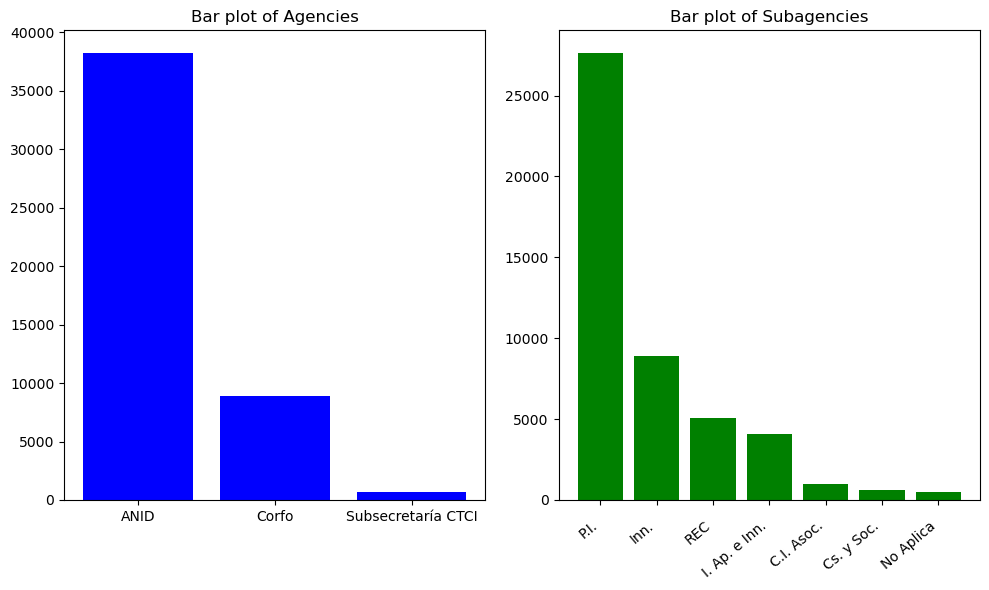

In [73]:
# Descriptive Analysis, Barplot - State agencies and sub-agencies



# Compute the counts of each agency and subagency
agency_counts = sf_data['Agencia'].value_counts()
subagency_counts = sf_data['subdireccion'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Create the State Agencies bar plot in the left subplot
axs[0].bar(agency_counts.index, agency_counts.values, color='blue')
axs[0].set_title('Bar plot of Agencies')

# Create a bar plot of the subagencies in the right subplot
axs[1].bar(subagency_counts.index, subagency_counts.values, color='green')
axs[1].set_title('Bar plot of Subagencies')

# Rotate the xtick labels by 40 degrees and set labels
labels = ['P.I.', 'Inn.', 'REC',  'I. Ap. e Inn.',  'C.I. Asoc.', 'Cs. y Soc.', 'No Aplica']
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels=labels, rotation=40, ha='right')

# Adjust the spacing between the tick labels
axs[1].tick_params(axis='x', which='major', pad=10)

# Add some whitespace at the bottom of the image
plt.subplots_adjust(bottom=0.2)

# Save the figure as a PNG file with a higher dpi and tight layout
fig.tight_layout()
#fig.savefig('agencies_subagencies_barplot.png', dpi=300)

# Display the plot
plt.show()

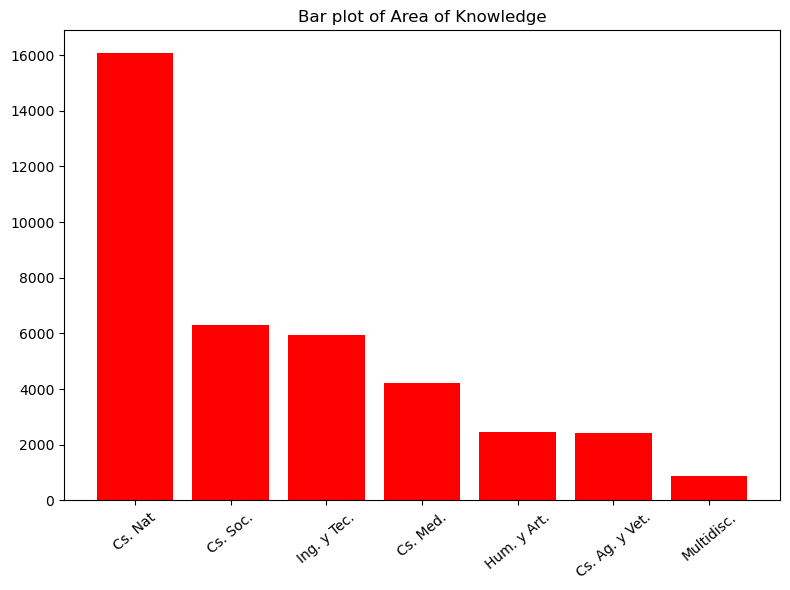

In [74]:
# Descriptive Analysis, Barplot - Area of Knowledge

aok_counts = sf_data[(sf_data['AreaConocimiento'] != 'Sin información') & (sf_data['AreaConocimiento'] != 'No Aplica')].AreaConocimiento.value_counts()

fig_2 = plt.figure(figsize=(8,6))
ax_1 = plt.bar(aok_counts.index, aok_counts.values, color='red')
plt.title('Bar plot of Area of Knowledge')
aok_ticks = [0, 1, 2, 3, 4, 5, 6]
aok_labels = ['Cs. Nat', 'Cs. Soc.', 'Ing. y Tec.', 'Cs. Med.', 'Hum. y Art.', 'Cs. Ag. y Vet.', 'Multidisc.']
plt.xticks(ticks = aok_ticks, labels = aok_labels, rotation=40)

# Adjust the plot layout to fit the labels
plt.tight_layout()

# Save the figure as a PNG file
#fig_2.savefig('area_of_knowledge_barplot.png', bbox_inches='tight')

# Display the plot
plt.show()

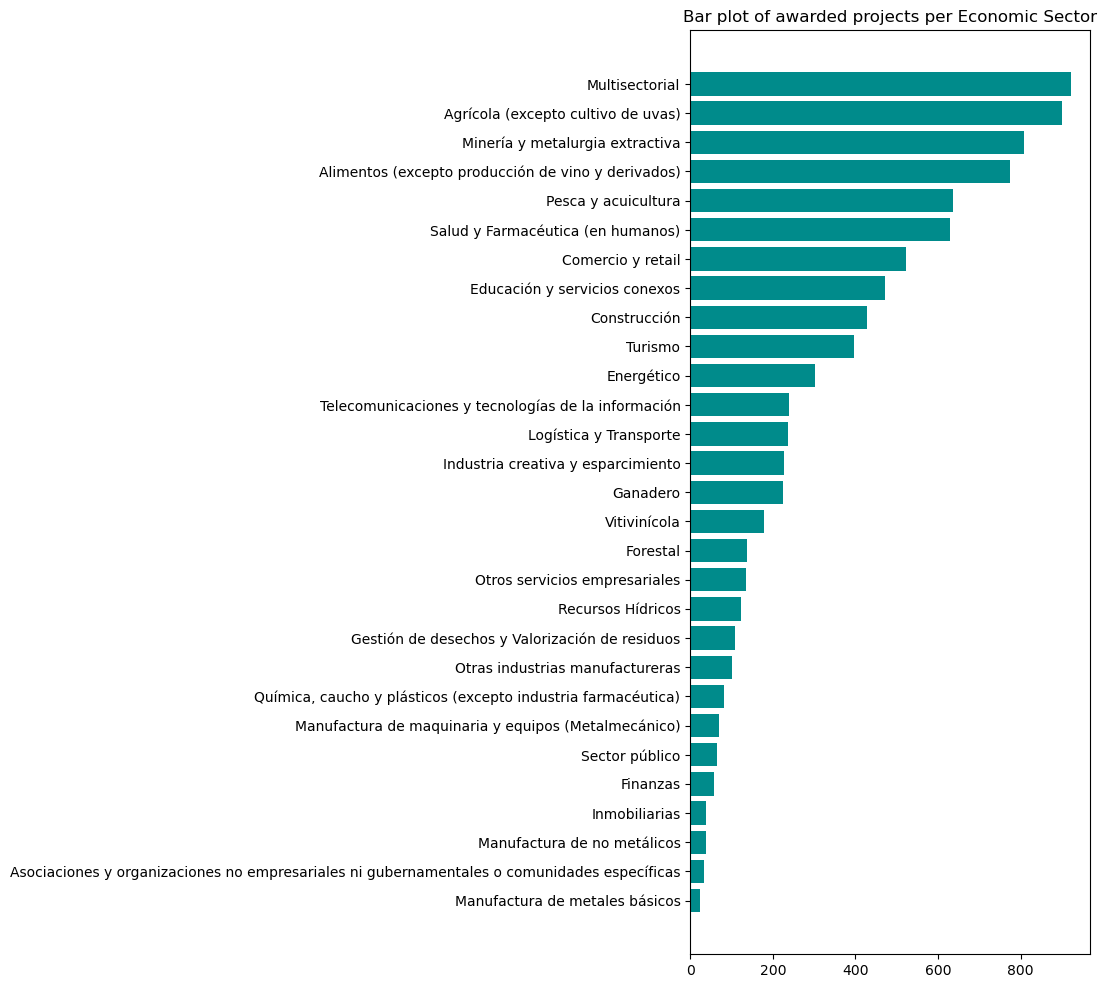

In [84]:
# Descriptive Analysis, Barplot - Economic Sector
es_counts = sf_data[sf_data['SectorEconomico'] != 'sin información']['SectorEconomico'].value_counts()

fig_3, ax_6 = plt.subplots(figsize=(8,12))
ax_6.barh(es_counts.index, es_counts.values, color='darkcyan')
ax_6.set_title('Bar plot of awarded projects per Economic Sector')

# Invert the y-axis to show the economic sectors with the highest counts at the top
ax_6.invert_yaxis()

# Adjust the spacing between the y tick labels and the left edge of the plot
plt.subplots_adjust(left=0.4)

# Save the figure as a PNG file
fig_3.savefig('es_barplot.png')

plt.show()

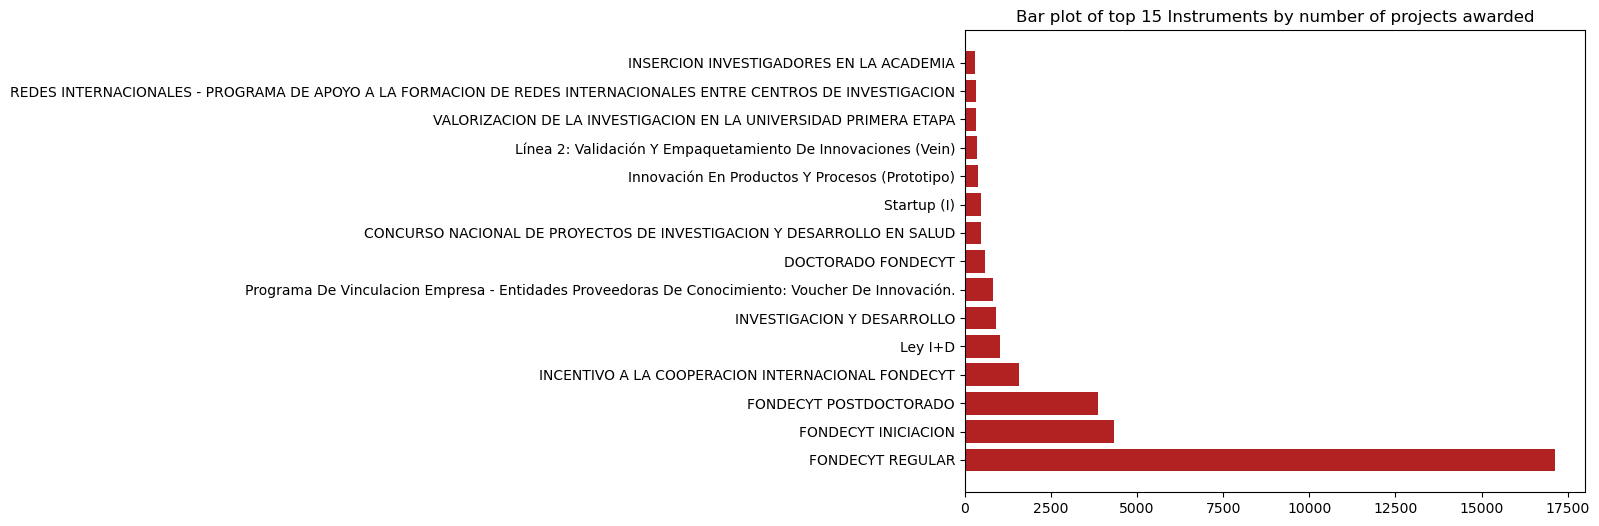

In [13]:
# Descriptive Analysis, Barplot - Instrument

i_counts = sf_data.Instrumento.value_counts()
top_counts = i_counts.head(15)
fig_4 = plt.figure(figsize=(8,6))
ax_6 = plt.barh(top_counts.index, top_counts.values, color = 'firebrick')
plt.title("Bar plot of top 15 Instruments by number of projects awarded")
plt.show()

# Save the figure as a PNG file
#fig_4.savefig('top15inst_barplot.png')

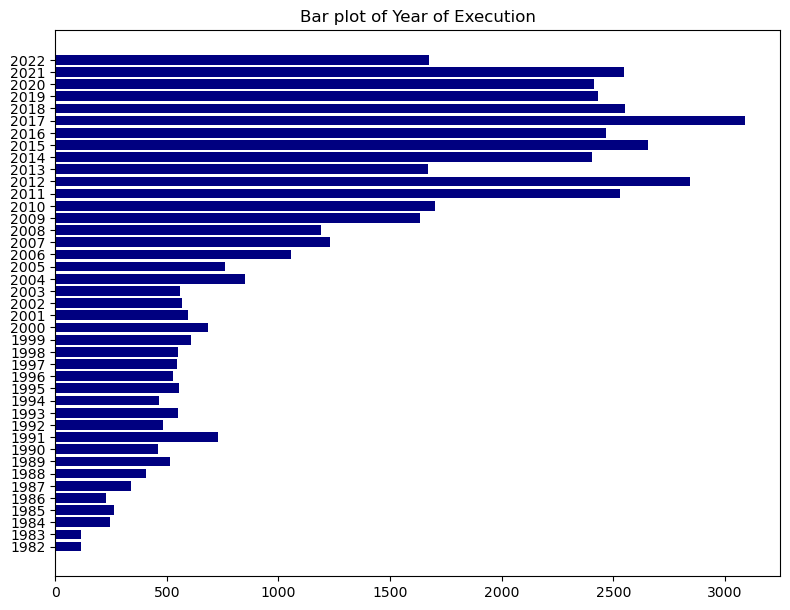

In [14]:
# Descriptive Analysis, Bar Plot - Year of Execution
year_counts = sf_data['Año'].value_counts()

fig_5 = plt.figure(figsize=(8,6))
ax_2 = plt.barh(year_counts.index, year_counts.values, color='navy')
plt.yticks(range(1982, 2023))
plt.tight_layout()
plt.title('Bar plot of Year of Execution')
plt.show()

# Save the figure as a PNG file
#fig_5.savefig('year_barplot.png')

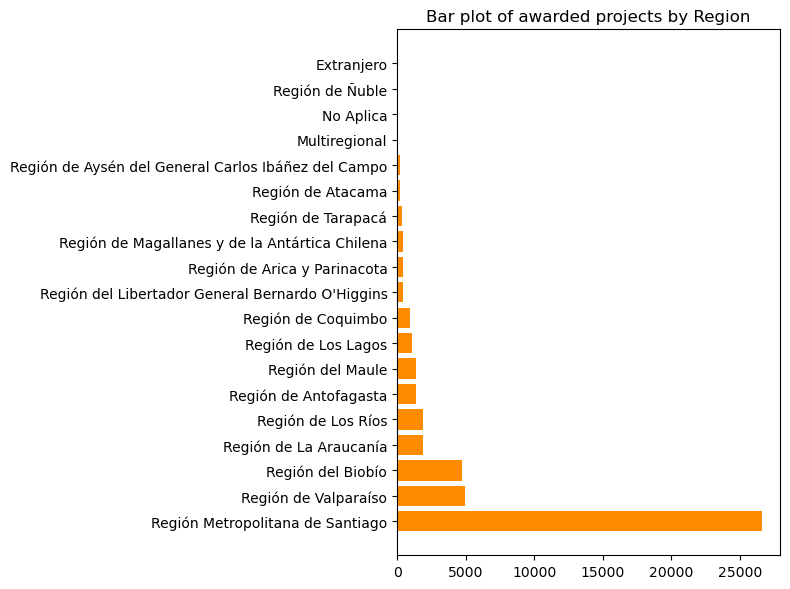

In [85]:
# Descriptive Analysis, Bar chart - Region of Execution

curated_region_data = sf_data[(sf_data['RegionEjecucion'] != 'Sin Información') & ((sf_data['RegionEjecucion'] != 'Sin definir'))]['RegionEjecucion'].value_counts()

fig_6 = plt.figure(figsize=(8,6))
ax_4 = plt.barh(curated_region_data.index, curated_region_data.values, color = 'darkorange')
plt.title("Bar plot of awarded projects by Region")
plt.tight_layout()
plt.show()

# Save the figure as a PNG file
fig_6.savefig('awproj_region_barplot.png')

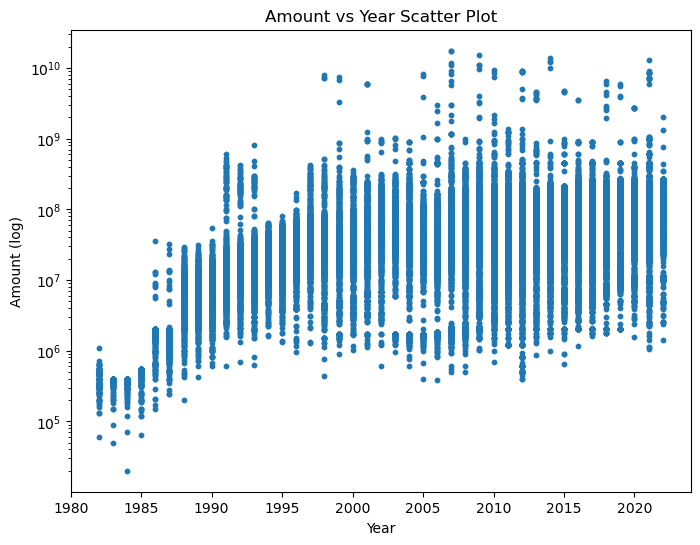

In [16]:
# Exploratory Analysis, Scatterplot: Amount granted by time

fig_7 = plt.figure(figsize=(8,6))
valid_data = sf_data[(sf_data['Año']) != 0 & (sf_data['Monto'] != 0)]
plt.scatter(valid_data['Año'], valid_data['Monto'], s=10)
plt.title('Amount vs Year Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Amount (log)')
plt.yscale('log')
plt.show()

# Save the figure as a PNG file
#fig_7.savefig('amount_year_scatter.png')

In [17]:
# Grouped table - State agencies: Average amount granted by Agency

aag_a = sf_data.groupby(['Agencia']).Monto.mean()
print(aag_a)

max_idx = aag_a.idxmax()
max_a = max_idx
max_aa_a = round(aag_a.loc[max_idx], 2)

min_idx = aag_a.idxmin()
min_a = min_idx
min_aa_a = round(aag_a.loc[min_idx], 2)

print(max_a)
print(max_aa_a)
print(min_a)
print(min_aa_a)

Agencia
ANID                  8.980344e+07
Corfo                 5.853113e+07
Subsecretaría CTCI    4.584447e+07
Name: Monto, dtype: float64
ANID
89803439.02
Subsecretaría CTCI
45844467.65


In [18]:
# Grouped table - State agencies and sub-agencies: Average amount granted by Sub-agency

aag_sa = sf_data[sf_data['subdireccion'] != 'No Aplica'].groupby(['subdireccion']).Monto.mean()
print(aag_sa)

max_idx_2 = aag_sa.idxmax()
max_sa = max_idx_2
max_aa_sa = round(aag_sa.loc[max_idx_2], 2)

min_idx_2 = aag_sa.idxmin()
min_sa = min_idx_2
min_aa_sa = round(aag_sa.loc[min_idx_2], 2)

print(max_sa)
print(max_aa_sa)
print(min_sa)
print(min_aa_sa)


subdireccion
Centros e Investigación Asociativa     8.597148e+08
Ciencia y Sociedad                     4.584447e+07
Innovación                             5.853113e+07
Investigación Aplicada e Innovación    1.145396e+08
Proyectos de Investigación             6.729778e+07
REC                                    4.022675e+07
Name: Monto, dtype: float64
Centros e Investigación Asociativa
859714766.75
REC
40226751.19


In [19]:
# Grouped table - Funding instruments: Average amount granted by Instrument

aag_i = sf_data[sf_data['Monto'] != 0].groupby(['Instrumento']).Monto.mean()
print(aag_i)

max_idx_3 = aag_i.idxmax()
max_i = max_idx_3
max_aa_i = round(aag_i.loc[max_idx_3], 2)

min_idx_3 = aag_i.idxmin()
min_i = min_idx_3
min_aa_i = round(aag_i.loc[min_idx_3], 2)

print(max_i)
print(max_aa_i)
print(min_i)
print(min_aa_i)

Instrumento
2014/Gestion De La Innovacion                                        2.997992e+07
ACCION REGIONAL                                                      9.948286e+07
ALIMENTOS FUNCIONALES                                                1.661598e+08
AMSUD                                                                1.302437e+08
ANILLOS CYT                                                          4.500000e+08
                                                                         ...     
VIU - Etapa 1                                                        2.000000e+06
VIU - Etapa 2                                                        2.400000e+07
VIU - Etapa 2 Bases 4091/2018 Octava Convocatoria RenovaciOn 2019    2.400000e+07
VIU - Una Etapa                                                      2.991396e+07
Voucher De Innovación Para Empresas De Mujeres                       6.640054e+06
Name: Monto, Length: 398, dtype: float64
CENTROS CIENTIFICOS Y TECNOLOGICOS DE EXCELEN

In [20]:
# Grouped table - Funding instruments: Average amount granted by Type of Contest
aag_tc = sf_data.groupby(['Tipo']).Monto.mean()
print(aag_tc)

max_idx_4 = aag_tc.idxmax()
max_tc = max_idx_4
max_aa_tc = round(aag_tc.loc[max_idx_4], 2)

min_idx_4 = aag_tc.idxmin()
min_tc = min_idx_4
min_aa_tc = round(aag_tc.loc[min_idx_4], 2)

print(max_tc)
print(max_aa_tc)
print(min_tc)
print(min_aa_tc)

Tipo
Ley         2.973494e+06
Subsidio    8.499977e+07
Name: Monto, dtype: float64
Subsidio
84999768.95
Ley
2973493.76


In [21]:
# Grouped table - Funding instruments: Average amount granted by Year of Execution

aag_y = sf_data.groupby('Año').Monto.mean()

print(aag_y)

max_idx_5 = aag_y.idxmax()
max_y = max_idx_5
max_aa_y = round(aag_y.loc[max_idx_5], 2)

min_idx_5 = aag_y.idxmin()
min_y = min_idx_5
min_aa_y = round(aag_y.loc[min_idx_5], 2)

print(max_y)
print(max_aa_y)
print(min_y)
print(min_aa_y)


Año
1982    3.925826e+05
1983    3.601197e+05
1984    3.719306e+05
1985    4.850038e+05
1986    1.922329e+06
1987    1.895788e+06
1988    7.142437e+06
1989    7.374891e+06
1990    8.643455e+06
1991    3.502765e+07
1992    3.402567e+07
1993    3.089621e+07
1994    2.214799e+07
1995    2.364391e+07
1996    3.228727e+07
1997    5.882444e+07
1998    8.758463e+07
1999    7.724010e+07
2000    4.571698e+07
2001    1.036240e+08
2002    7.088161e+07
2003    6.932902e+07
2004    6.576380e+07
2005    7.036357e+07
2006    5.679170e+07
2007    1.462253e+08
2008    6.200614e+07
2009    1.232265e+08
2010    9.263879e+07
2011    7.475031e+07
2012    9.826054e+07
2013    8.994597e+07
2014    9.517077e+07
2015    8.825891e+07
2016    8.578053e+07
2017    7.682009e+07
2018    9.592420e+07
2019    1.023544e+08
2020    9.323178e+07
2021    1.414834e+08
2022    1.065992e+08
Name: Monto, dtype: float64
2007
146225337.69
1983
360119.66


In [22]:
# Grouped table - Awardees: Average amount granted by Economic Sector

aag_ea = sf_data[sf_data['SectorEconomico'] != 'sin información'].groupby(['SectorEconomico']).Monto.mean()

print(aag_ea)

max_idx_6 = aag_ea.idxmax()
max_ea = max_idx_6
max_aa_ea = round(aag_ea.loc[max_idx_6], 2)

min_idx_6 = aag_ea.idxmin()
min_ea = min_idx_6
min_aa_ea = round(aag_ea.loc[min_idx_6], 2)

print(max_ea)
print(max_aa_ea)
print(min_ea)
print(min_aa_ea)

SectorEconomico
Agrícola (excepto cultivo de uvas)                                                             5.706615e+07
Alimentos (excepto producción de vino y derivados)                                             3.718694e+07
Asociaciones y organizaciones no empresariales ni gubernamentales o comunidades específicas    3.690815e+07
Comercio y retail                                                                              3.200607e+07
Construcción                                                                                   5.481725e+07
Educación y servicios conexos                                                                  4.431951e+07
Energético                                                                                     6.208279e+07
Finanzas                                                                                       4.941506e+07
Forestal                                                                                       4.670959e+07
Ganadero    

In [23]:
# Grouped table - Awardees: Average amount granted by Area of Knowledge

aag_ak = sf_data[(sf_data['AreaConocimiento'] != 'Sin información') & (sf_data['AreaConocimiento'] != 'No Aplica')].groupby(['AreaConocimiento']).Monto.mean()
print(aag_ak)

max_idx_7 = aag_ak.idxmax()
max_ak = max_idx_7
max_aa_ak = round(aag_ak.loc[max_idx_7], 2)

min_idx_7 = aag_ak.idxmin()
min_ak = min_idx_7
min_aa_ak = round(aag_ak.loc[min_idx_7], 2)

print(max_ak)
print(max_aa_ak)
print(min_ak)
print(min_aa_ak)

AreaConocimiento
Ciencias Agrícolas y Veterinarias    9.903207e+07
Ciencias Médicas y de la Salud       8.869418e+07
Ciencias Naturales                   9.540431e+07
Ciencias Sociales                    6.451022e+07
Humanidades y Artes                  4.469886e+07
Ingeniería y Tecnología              9.711795e+07
Multidisciplinario                   2.182715e+08
Name: Monto, dtype: float64
Multidisciplinario
218271493.5
Humanidades y Artes
44698859.58


In [24]:
# Grouped table - Awardees: Average amount granted by Type of Beneficiary

aag_tb = sf_data[sf_data['TipoBeneficiario'] != 'Sin información'].groupby(['TipoBeneficiario']).Monto.mean()
print(aag_tb)

max_idx_8 = aag_tb.idxmax()
max_tb = max_idx_8
max_aa_tb = round(aag_tb.loc[max_idx_8], 2)

min_idx_8 = aag_tb.idxmin()
min_tb = min_idx_8
min_aa_tb = round(aag_tb.loc[min_idx_8], 2)

print(max_tb)
print(max_aa_tb)
print(min_tb)
print(min_aa_tb)

TipoBeneficiario
Otra                                                         2.159080e+07
Persona Jurídica                                             1.655018e+08
Persona Jurídica - Empresa                                   3.715557e+07
Persona Jurídica - Institución Privada Sin Fines de Lucro    3.076437e+07
Persona Jurídica - Institución de Educación Superior         9.393932e+07
Persona Jurídica - Servicios Públicos                        2.995000e+07
Persona Natural                                              6.835075e+07
Name: Monto, dtype: float64
Persona Jurídica
165501783.93
Otra
21590797.24


In [25]:
# Grouped table - Awardees: Average amount granted by region

aag_r = sf_data[(sf_data['RegionEjecucion'] != 'Sin Información') & ((sf_data['RegionEjecucion'] != 'Sin definir'))].groupby(['RegionEjecucion']).Monto.mean()
print(aag_r)

max_idx_9 = aag_r.idxmax()
max_r = max_idx_9
max_aa_r = round(aag_r.loc[max_idx_9], 2)

min_idx_9 = aag_r.idxmin()
min_r = min_idx_9
min_aa_r = round(aag_r.loc[min_idx_9], 2)

print(max_r)
print(max_aa_r)
print(min_r)
print(min_aa_r)


RegionEjecucion
Extranjero                                             6.909239e+06
Multiregional                                          2.027068e+08
No Aplica                                              4.428252e+07
Región Metropolitana de Santiago                       8.642542e+07
Región de Antofagasta                                  7.775534e+07
Región de Arica y Parinacota                           6.989474e+07
Región de Atacama                                      8.245006e+07
Región de Aysén del General Carlos Ibáñez del Campo    1.022045e+08
Región de Coquimbo                                     7.862042e+07
Región de La Araucanía                                 7.287728e+07
Región de Los Lagos                                    7.427428e+07
Región de Los Ríos                                     9.639722e+07
Región de Magallanes y de la Antártica Chilena         1.045515e+08
Región de Tarapacá                                     8.876220e+07
Región de Valparaíso            

In [68]:
# Highest and lowest average amount granted per category - Summarizing table.

import dataframe_image as dfi

aa_data = {'Max Element': [max_a, max_sa, max_i, max_tc, max_y, max_ea, max_ak, max_tb, max_r],\
          'Max Amount (CLP)': [max_aa_a, max_aa_sa, max_aa_i, max_aa_tc, max_aa_y, max_aa_ea, max_aa_ak, max_aa_tb, max_aa_r],\
          'Min Element': [min_a, min_sa, min_i, min_tc, min_y, min_ea, min_ak, min_tb, min_r],\
          'Min Amount (CLP)': [min_aa_a, min_aa_sa, min_aa_i, min_aa_tc, min_aa_y, min_aa_ea, min_aa_ak, min_aa_tb, min_aa_r]}

summary_table = pd.DataFrame(aa_data, index=['Agency', 'Subagency', 'Instrument', 'Type of Contest', 'Year', 'Economic Sector',\
                                            'Area of Knowledge', 'Type of Beneficiary', 'Region'])

summary_table
#dfi.export(summary_table, 'summary_table_general.png')

C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe


In [27]:
# Define function to get max and min values.

def max_min_func(list_of_series):
    list_of_texts = []
    for i in list_of_series:
        name_of_series = i.index.name
        series_max = round(i.max(), 2)
        series_min = round(i.min(),2)
        list_of_texts.append(f'The {name_of_series} column has a maximum value of CLP{series_max} and a minimum value of CLP{series_min}.\n')
    for x in list_of_texts:
        print(x)

In [28]:
# Get max and min values of the different grouped tables (Year, Economic Sector, Area of Knowledge, Type of Beneficiary, Region)

grouped_tables = [aag_a, aag_sa, aag_i, aag_tc, aag_y, aag_ea, aag_ak, aag_tb, aag_r]
max_min_func(grouped_tables)

The Agencia column has a maximum value of CLP89803439.02 and a minimum value of CLP45844467.65.

The subdireccion column has a maximum value of CLP859714766.75 and a minimum value of CLP40226751.19.

The Instrumento column has a maximum value of CLP10908859194.35 and a minimum value of CLP590050.12.

The Tipo column has a maximum value of CLP84999768.95 and a minimum value of CLP2973493.76.

The Año column has a maximum value of CLP146225337.69 and a minimum value of CLP360119.66.

The SectorEconomico column has a maximum value of CLP92864661.13 and a minimum value of CLP26882051.74.

The AreaConocimiento column has a maximum value of CLP218271493.5 and a minimum value of CLP44698859.58.

The TipoBeneficiario column has a maximum value of CLP165501783.93 and a minimum value of CLP21590797.24.

The RegionEjecucion column has a maximum value of CLP202706838.09 and a minimum value of CLP6909239.11.



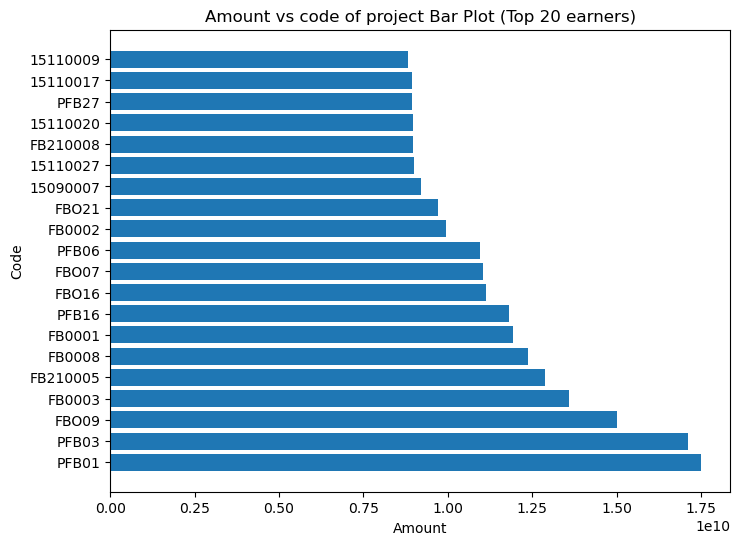

In [29]:
# High Earners analysis
# Bar plot: Amount granted by code of project (Top 20 high earners)

high_earner_projects = sf_data.sort_values(by=['Monto'], ascending = False).head(20)

fig_8 = plt.figure(figsize=(8,6))
plt.barh(high_earner_projects['Código'], high_earner_projects['Monto'])
plt.title('Amount vs code of project Bar Plot (Top 20 earners)')
plt.xlabel('Amount')
plt.ylabel('Code')
plt.show()

#fig_8.savefig('amount_code_top20earners_barplot.png')

In [30]:
high_earner_projects.Monto.min()

8815859000.0

In [31]:
# Get high amount projects years (Top 20)

high_earner_projects = sf_data.sort_values(by=['Monto'], ascending = False).head(20)
high_earner_projects['Año'].value_counts()

2007    5
2009    4
2014    4
2012    4
2021    2
2010    1
Name: Año, dtype: int64

In [32]:
# Get high amount projects Instrument (Top 20)

high_earner_projects['Instrumento'].value_counts()

CENTROS CIENTIFICOS Y TECNOLOGICOS DE EXCELENCIA (FINANCIAMIENTO BASAL)    13
CENTROS DE INVESTIGACION EN AREAS PRIORITARIAS                              5
FINANCIAMIENTO BASAL                                                        2
Name: Instrumento, dtype: int64

In [33]:
# Get high amount projects Region (Top 20)

high_earner_projects['RegionEjecucion'].value_counts()

Región Metropolitana de Santiago    15
Región de Valparaíso                 2
Región del Biobío                    2
Región de Los Ríos                   1
Name: RegionEjecucion, dtype: int64

In [34]:
# Get high amount projects Area of Knowledge (Top 20)

high_earner_projects['AreaConocimiento'].value_counts()

Ciencias Naturales         7
Ingeniería y Tecnología    6
Multidisciplinario         6
Ciencias Sociales          1
Name: AreaConocimiento, dtype: int64

In [35]:
# Grouped table - State agencies: Average amount granted by Agency for the top 20 highest earner projects

aag_a_top20 = high_earner_projects.groupby(['Agencia']).Monto.mean()
print(aag_a_top20)

max_idx_top20_1 = aag_a_top20.idxmax()
max_a_top20 = max_idx_top20_1
max_aa_a_top20 = round(aag_a_top20.loc[max_idx_top20_1], 2)

min_idx_top20_1 = aag_a_top20.idxmin()
min_a_top20 = min_idx_top20_1
min_aa_a_top20 = round(aag_a_top20.loc[min_idx_top20_1], 2)

print(max_a_top20)
print(max_aa_a_top20)
print(min_a_top20)
print(min_aa_a_top20)

Agencia
ANID    1.138972e+10
Name: Monto, dtype: float64
ANID
11389716520.2
ANID
11389716520.2


In [36]:
# Grouped table - State agencies : Average amount granted by subagency for top 20 highest earner projects

aag_sa_top20 = high_earner_projects[high_earner_projects['subdireccion'] != 'No Aplica'].groupby(['subdireccion']).Monto.mean()
print(aag_sa_top20)

max_idx_top20_2 = aag_sa_top20.idxmax()
max_sa_top20 = max_idx_top20_2
max_aa_sa_top20 = round(aag_sa_top20.loc[max_idx_top20_2], 2)

min_idx_top20_2 = aag_sa_top20.idxmin()
min_sa_top20 = min_idx_top20_2
min_aa_sa_top20 = round(aag_sa_top20.loc[min_idx_top20_2], 2)

print(max_sa_top20)
print(max_aa_sa_top20)
print(min_sa_top20)
print(min_aa_sa_top20)

subdireccion
Centros e Investigación Asociativa    1.138972e+10
Name: Monto, dtype: float64
Centros e Investigación Asociativa
11389716520.2
Centros e Investigación Asociativa
11389716520.2


In [37]:
# Grouped table: Average amount granted by instrument for top 20 highest earner projects

aag_i_top20 = high_earner_projects.groupby(['Instrumento']).Monto.mean()
print(aag_i_top20)

max_idx_top20_3 = aag_i_top20.idxmax()
max_i_top20 = max_idx_top20_3
max_aa_i_top20 = round(aag_i_top20.loc[max_idx_top20_3], 2)

min_idx_top20_3 = aag_i_top20.idxmin()
min_i_top20 = min_idx_top20_3
min_aa_i_top20 = round(aag_i_top20.loc[min_idx_top20_3], 2)

print(max_i_top20)
print(max_aa_i_top20)
print(min_i_top20)
print(min_aa_i_top20)

Instrumento
CENTROS CIENTIFICOS Y TECNOLOGICOS DE EXCELENCIA (FINANCIAMIENTO BASAL)    1.238853e+10
CENTROS DE INVESTIGACION EN AREAS PRIORITARIAS                             8.982792e+09
FINANCIAMIENTO BASAL                                                       1.091474e+10
Name: Monto, dtype: float64
CENTROS CIENTIFICOS Y TECNOLOGICOS DE EXCELENCIA (FINANCIAMIENTO BASAL)
12388529492.62
CENTROS DE INVESTIGACION EN AREAS PRIORITARIAS
8982791800.0


In [38]:
# Grouped table - Funding instruments: Average amount granted by Type of Contest for top 20 highest earner projects

aag_tc_top20 = high_earner_projects.groupby(['Tipo']).Monto.mean()
print(aag_tc_top20)

max_idx_top20_4 = aag_tc_top20.idxmax()
max_tc_top20 = max_idx_top20_4
max_aa_tc_top20 = round(aag_tc_top20.loc[max_idx_top20_4], 2)

min_idx_top20_4 = aag_tc_top20.idxmin()
min_tc_top20 = min_idx_top20_4
min_aa_tc_top20 = round(aag_tc_top20.loc[min_idx_top20_4], 2)

print(max_tc_top20)
print(max_aa_tc_top20)
print(min_tc_top20)
print(min_aa_tc_top20)

Tipo
Subsidio    1.138972e+10
Name: Monto, dtype: float64
Subsidio
11389716520.2
Subsidio
11389716520.2


In [39]:
# Grouped table - Funding instruments: Average amount granted by Year of Execution for top 20 highest earner projects

aag_y_top20 = high_earner_projects.groupby(['Año']).Monto.mean()
print(aag_y_top20)

max_idx_top20_5 = aag_y_top20.idxmax()
max_y_top20 = max_idx_top20_5
max_aa_y_top20 = round(aag_y_top20.loc[max_idx_top20_5], 2)

min_idx_top20_5 = aag_y_top20.idxmin()
min_y_top20 = min_idx_top20_5
min_aa_y_top20 = round(aag_y_top20.loc[min_idx_top20_5], 2)

print(max_y_top20)
print(max_aa_y_top20)
print(min_y_top20)
print(min_aa_y_top20)

Año
2007    1.326162e+10
2009    1.172266e+10
2010    9.206000e+09
2012    8.926990e+09
2014    1.196304e+10
2021    1.091474e+10
Name: Monto, dtype: float64
2007
13261615640.0
2012
8926989750.0


In [40]:
# Grouped table - Awardees: Average amount granted by Area of Knowledge for top 20 highest earner projects

aag_ak_top20 = high_earner_projects[(high_earner_projects['AreaConocimiento'] != 'Sin información') & (high_earner_projects['AreaConocimiento'] != 'No Aplica')].groupby(['AreaConocimiento']).Monto.mean()
print(aag_ak_top20)

max_idx_top20_6 = aag_ak_top20.idxmax()
max_ak_top20 = max_idx_top20_6
max_aa_ak_top20 = round(aag_ak_top20.loc[max_idx_top20_6], 2)

min_idx_top20_6 = aag_ak_top20.idxmin()
min_ak_top20 = min_idx_top20_6
min_aa_ak_top20 = round(aag_ak_top20.loc[min_idx_top20_6], 2)

print(max_ak_top20)
print(max_aa_ak_top20)
print(min_ak_top20)
print(min_aa_ak_top20)

AreaConocimiento
Ciencias Naturales         1.262976e+10
Ciencias Sociales          1.358111e+10
Ingeniería y Tecnología    1.136781e+10
Multidisciplinario         9.599672e+09
Name: Monto, dtype: float64
Ciencias Sociales
13581109400.0
Multidisciplinario
9599671944.0


In [41]:
# Grouped table - Awardees: Average amount granted by Type of Beneficiary for top 20 highest earners

aag_tb_top20 = high_earner_projects[high_earner_projects['TipoBeneficiario'] != 'Sin información'].groupby(['TipoBeneficiario']).Monto.mean()
print(aag_tb_top20)

max_idx_top20_7 = aag_tb_top20.idxmax()
max_tb_top20 = max_idx_top20_7
max_aa_tb_top20 = round(aag_tb_top20.loc[max_idx_top20_7], 2)

min_idx_top20_7 = aag_tb_top20.idxmin()
min_tb_top20 = min_idx_top20_7
min_aa_tb_top20 = round(aag_tb_top20.loc[min_idx_top20_7], 2)

print(max_tb_top20)
print(max_aa_tb_top20)
print(min_tb_top20)
print(min_aa_tb_top20)

TipoBeneficiario
Persona Jurídica    1.138972e+10
Name: Monto, dtype: float64
Persona Jurídica
11389716520.2
Persona Jurídica
11389716520.2


In [42]:
# Grouped table - Awardees: Average amount granted by region for Top 20 highest earner projects

aag_r_top20 = high_earner_projects[(high_earner_projects['RegionEjecucion'] != 'Sin Información') \
                                  & (high_earner_projects['RegionEjecucion'] != 'Sin definir') &\
                                 (high_earner_projects['RegionEjecucion'] != 'No Aplica')].groupby(['RegionEjecucion']).Monto.mean()
print(aag_r_top20)

max_idx_top20_8 = aag_r_top20.idxmax()
max_r_top20 = max_idx_top20_8
max_aa_r_top20 = round(aag_r_top20.loc[max_idx_top20_8], 2)

min_idx_top20_8 = aag_r_top20.idxmin()
min_r_top20 = min_idx_top20_8
min_aa_r_top20 = round(aag_r_top20.loc[min_idx_top20_8], 2)

print(max_r_top20)
print(max_aa_r_top20)
print(min_r_top20)
print(min_aa_r_top20)


RegionEjecucion
Región Metropolitana de Santiago    1.138234e+10
Región de Los Ríos                  1.748951e+10
Región de Valparaíso                1.081745e+10
Región del Biobío                   8.967408e+09
Name: Monto, dtype: float64
Región de Los Ríos
17489509000.0
Región del Biobío
8967408000.0


In [69]:
# Highest and lowest average amount granted per category for top 20 highest earner projects - Summarizing table.

aa_data_top20 = {'Max Element': [max_a_top20, max_sa_top20, max_i_top20, max_tc_top20, max_y_top20, np.NaN, max_ak_top20, max_tb_top20, max_r_top20],\
          'Max Amount (CLP)': [max_aa_a_top20, max_aa_sa_top20, max_aa_i_top20, max_aa_tc_top20, max_aa_y_top20, np.NaN, max_aa_ak_top20, max_aa_tb_top20, max_aa_r_top20],\
          'Min Element': [min_a_top20, min_sa_top20, min_i_top20, min_tc_top20, min_y_top20, np.NaN, min_ak_top20, min_tb_top20, min_r_top20],\
          'Min Amount (CLP)': [min_aa_a_top20, min_aa_sa_top20, min_aa_i_top20, min_aa_tc_top20, min_aa_y_top20, np.NaN, min_aa_ak_top20, min_aa_tb_top20, min_aa_r_top20]}

summary_table_top20 = pd.DataFrame(aa_data_top20, index=['Agency', 'Subagency', 'Instrument', 'Type of Contest', 'Year', 'Economic Sector',\
                                            'Area of Knowledge', 'Type of Beneficiary', 'Region'])


summary_table_top20
#dfi.export(summary_table_top20, 'summary_table_top20.png')

C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe


In [44]:
# Grouped table - State agencies : Average amount granted by Agency for last 5 years projects

# Get rows

last_5_years_projects = sf_data[(sf_data['Año'] > 2017) & (sf_data['Monto'] > 0)]

aag_a_l5y = last_5_years_projects.groupby(['Agencia']).Monto.mean()
print(aag_a_l5y)

max_idx_l5y_1 = aag_a_l5y.idxmax()
max_a_l5y = max_idx_l5y_1
max_aa_a_l5y = round(aag_a_l5y.loc[max_idx_l5y_1], 2)

min_idx_l5y_1 = aag_a_l5y.idxmin()
min_a_l5y = min_idx_l5y_1
min_aa_a_l5y = round(aag_a_l5y.loc[min_idx_l5y_1], 2)

print(max_a_l5y)
print(max_aa_a_l5y)
print(min_a_l5y)
print(min_aa_a_l5y)

Agencia
ANID                  1.355015e+08
Corfo                 4.888879e+07
Subsecretaría CTCI    7.420562e+07
Name: Monto, dtype: float64
ANID
135501495.55
Corfo
48888786.74


In [45]:
# Grouped table - State agencies : Average amount granted by subagency for last 5 years projects

aag_sa_l5y = last_5_years_projects[last_5_years_projects['subdireccion'] != 'No Aplica'].groupby(['subdireccion']).Monto.mean()
print(aag_sa_l5y)

max_idx_l5y_3 = aag_sa_l5y.idxmax()
max_sa_l5y = max_idx_l5y_3
max_aa_sa_l5y = round(aag_sa_l5y.loc[max_idx_l5y_3], 2)

min_idx_l5y_3 = aag_sa_l5y.idxmin()
min_sa_l5y = min_idx_l5y_3
min_aa_sa_l5y = round(aag_sa_l5y.loc[min_idx_l5y_3], 2)

print(max_sa_l5y)
print(max_aa_sa_l5y)
print(min_sa_l5y)
print(min_aa_sa_l5y)

subdireccion
Centros e Investigación Asociativa     9.218704e+08
Ciencia y Sociedad                     7.420562e+07
Innovación                             4.888879e+07
Investigación Aplicada e Innovación    1.167495e+08
Proyectos de Investigación             1.150023e+08
REC                                    7.392575e+07
Name: Monto, dtype: float64
Centros e Investigación Asociativa
921870354.41
Innovación
48888786.74


In [46]:
# Grouped table: Average amount granted by instrument for last 5 year's projects

aag_i_l5y = last_5_years_projects.groupby(['Instrumento']).Monto.mean()
print(aag_i_l5y)

max_idx_l5y_2 = aag_i_l5y.idxmax()
max_i_l5y = max_idx_l5y_2
max_aa_i_l5y = round(aag_i_l5y.loc[max_idx_l5y_2], 2)

min_idx_l5y_2 = aag_i_l5y.idxmin()
min_i_l5y = min_idx_l5y_2
min_aa_i_l5y = round(aag_i_l5y.loc[min_idx_l5y_2], 2)

print(max_i_l5y)
print(max_aa_i_l5y)
print(min_i_l5y)
print(min_aa_i_l5y)


Instrumento
AMSUD                                                                1.302437e+08
ANILLOS CYT                                                          4.500000e+08
ANILLOS CYT O'HIGGINS                                                4.499993e+08
ANILLOS DE INVESTIGACION EN CIENCIAS SOCIALES Y HUMANIDADES          2.972727e+08
ANILLOS DE INVESTIGACION EN CIENCIAS Y TECNOLOGIA                    4.500000e+08
                                                                         ...     
VIU                                                                  2.369200e+07
VIU - Etapa 1                                                        2.000000e+06
VIU - Etapa 2                                                        2.400000e+07
VIU - Etapa 2 Bases 4091/2018 Octava Convocatoria RenovaciOn 2019    2.400000e+07
VIU - Una Etapa                                                      2.991396e+07
Name: Monto, Length: 173, dtype: float64
INSTITUTOS MILENIO
8400000000.0
VALORIZACION 

In [47]:
# Grouped table - Funding instruments: Average amount granted by Type of Contest for last 5 year's projects

aag_tc_l5y = last_5_years_projects.groupby(['Tipo']).Monto.mean()
print(aag_tc_l5y)

max_idx_l5y_4 = aag_tc_l5y.idxmax()
max_tc_l5y = max_idx_l5y_4
max_aa_tc_l5y = round(aag_tc_l5y.loc[max_idx_l5y_4], 2)

min_idx_l5y_4 = aag_tc_l5y.idxmin()
min_tc_l5y = min_idx_l5y_4
min_aa_tc_l5y = round(aag_tc_l5y.loc[min_idx_l5y_4], 2)

print(max_tc_l5y)
print(max_aa_tc_l5y)
print(min_tc_l5y)
print(min_aa_tc_l5y)

Tipo
Ley         2.539859e+08
Subsidio    1.132330e+08
Name: Monto, dtype: float64
Ley
253985924.92
Subsidio
113232991.37


In [48]:
# Grouped table - Funding instruments: Average amount granted by Year of Execution for last 5 year's projects

aag_y_l5y = last_5_years_projects.groupby('Año').Monto.mean()

print(aag_y_l5y)

max_idx_l5y_5 = aag_y_l5y.idxmax()
max_y_l5y = max_idx_l5y_5
max_aa_y_l5y = round(aag_y_l5y.loc[max_idx_l5y_5], 2)

min_idx_l5y_5 = aag_y_l5y.idxmin()
min_y_l5y = min_idx_l5y_5
min_aa_y_l5y = round(aag_y_l5y.loc[min_idx_l5y_5], 2)

print(max_y_l5y)
print(max_aa_y_l5y)
print(min_y_l5y)
print(min_aa_y_l5y)

Año
2018    1.004730e+08
2019    1.049065e+08
2020    1.001315e+08
2021    1.512738e+08
2022    1.071757e+08
Name: Monto, dtype: float64
2021
151273785.51
2020
100131527.54


In [49]:
# Grouped table - Awardees: Average amount granted by Economic Sector for last 5 year's projects

aag_ea_l5y = last_5_years_projects[last_5_years_projects['SectorEconomico'] != 'sin información'].groupby(['SectorEconomico']).Monto.mean()

print(aag_ea_l5y)

max_idx_l5y_6 = aag_ea_l5y.idxmax()
max_ea_l5y = max_idx_l5y_6
max_aa_ea_l5y = round(aag_ea_l5y.loc[max_idx_l5y_6], 2)

min_idx_l5y_6 = aag_ea_l5y.idxmin()
min_ea_l5y = min_idx_l5y_6
min_aa_ea_l5y = round(aag_ea_l5y.loc[min_idx_l5y_6], 2)

print(max_ea_l5y)
print(max_aa_ea_l5y)
print(min_ea_l5y)
print(min_aa_ea_l5y)

SectorEconomico
Agrícola (excepto cultivo de uvas)                                                             4.973720e+07
Alimentos (excepto producción de vino y derivados)                                             3.126548e+07
Asociaciones y organizaciones no empresariales ni gubernamentales o comunidades específicas    3.231001e+07
Comercio y retail                                                                              3.397875e+07
Construcción                                                                                   4.285210e+07
Educación y servicios conexos                                                                  3.595356e+07
Energético                                                                                     8.743575e+07
Finanzas                                                                                       5.648690e+07
Forestal                                                                                       5.410878e+07
Ganadero    

In [50]:
# Grouped table - Awardees: Average amount granted by Area of Knowledge for last 5 year's projects

aag_ak_l5y = last_5_years_projects[(last_5_years_projects['AreaConocimiento'] != 'Sin información') & (last_5_years_projects['AreaConocimiento'] != 'No Aplica')].groupby(['AreaConocimiento']).Monto.mean()
print(aag_ak_l5y)

max_idx_l5y_7 = aag_ak_l5y.idxmax()
max_ak_l5y = max_idx_l5y_7
max_aa_ak_l5y = round(aag_ak_l5y.loc[max_idx_l5y_7], 2)

min_idx_l5y_7 = aag_ak_l5y.idxmin()
min_ak_l5y = min_idx_l5y_7
min_aa_ak_l5y = round(aag_ak_l5y.loc[min_idx_l5y_7], 2)

print(max_ak_l5y)
print(max_aa_ak_l5y)
print(min_ak_l5y)
print(min_aa_ak_l5y)

AreaConocimiento
Ciencias Agrícolas y Veterinarias    1.307095e+08
Ciencias Médicas y de la Salud       1.396385e+08
Ciencias Naturales                   1.557560e+08
Ciencias Sociales                    9.871432e+07
Humanidades y Artes                  7.463875e+07
Ingeniería y Tecnología              1.446698e+08
Multidisciplinario                   2.403605e+08
Name: Monto, dtype: float64
Multidisciplinario
240360475.55
Humanidades y Artes
74638747.14


In [51]:
# Grouped table - Awardees: Average amount granted by Type of Beneficiary for last 5 year's projects

aag_tb_l5y = last_5_years_projects[last_5_years_projects['TipoBeneficiario'] != 'Sin información'].groupby(['TipoBeneficiario']).Monto.mean()
print(aag_tb_l5y)

max_idx_l5y_8 = aag_tb_l5y.idxmax()
max_tb_l5y = max_idx_l5y_8
max_aa_tb_l5y = round(aag_tb_l5y.loc[max_idx_l5y_8], 2)

min_idx_l5y_8 = aag_tb_l5y.idxmin()
min_tb_l5y = min_idx_l5y_8
min_aa_tb_l5y = round(aag_tb_l5y.loc[min_idx_l5y_8], 2)

print(max_tb_l5y)
print(max_aa_tb_l5y)
print(min_tb_l5y)
print(min_aa_tb_l5y)

TipoBeneficiario
Otra                                                         1.979877e+07
Persona Jurídica                                             1.926471e+08
Persona Jurídica - Empresa                                   3.112290e+07
Persona Jurídica - Institución Privada Sin Fines de Lucro    3.079171e+07
Persona Jurídica - Institución de Educación Superior         1.186193e+08
Persona Natural                                              1.158455e+08
Name: Monto, dtype: float64
Persona Jurídica
192647064.81
Otra
19798767.4


In [52]:
# Grouped table - Awardees: Average amount granted by region for last 5 year's projects

aag_r_l5y = last_5_years_projects[(last_5_years_projects['RegionEjecucion'] != 'Sin Información') \
                                  & (last_5_years_projects['RegionEjecucion'] != 'Sin definir') &\
                                 (last_5_years_projects['RegionEjecucion'] != 'No Aplica')].groupby(['RegionEjecucion']).Monto.mean()
print(aag_r_l5y)

max_idx_l5y_9 = aag_r_l5y.idxmax()
max_r_l5y = max_idx_l5y_9
max_aa_r_l5y = round(aag_r_l5y.loc[max_idx_l5y_9], 2)

min_idx_l5y_9 = aag_r_l5y.idxmin()
min_r_l5y = min_idx_l5y_9
min_aa_r_l5y = round(aag_r_l5y.loc[min_idx_l5y_9], 2)

print(max_r_l5y)
print(max_aa_r_l5y)
print(min_r_l5y)
print(min_aa_r_l5y)

RegionEjecucion
Multiregional                                          2.027068e+08
Región Metropolitana de Santiago                       1.238996e+08
Región de Antofagasta                                  9.681403e+07
Región de Arica y Parinacota                           1.001921e+08
Región de Atacama                                      7.537301e+07
Región de Aysén del General Carlos Ibáñez del Campo    1.274727e+08
Región de Coquimbo                                     9.584375e+07
Región de La Araucanía                                 9.392968e+07
Región de Los Lagos                                    8.148763e+07
Región de Los Ríos                                     1.366187e+08
Región de Magallanes y de la Antártica Chilena         1.891644e+08
Región de Tarapacá                                     7.983269e+07
Región de Valparaíso                                   9.055945e+07
Región de Ñuble                                        3.783095e+07
Región del Biobío               

In [70]:
# Highest and lowest average amount granted per category for last 5 years projects - Summarizing table.

aa_data_l5y = {'Max Element': [max_a_l5y, max_sa_l5y, max_i_l5y, max_tc_l5y, max_y_l5y, max_ea_l5y, max_ak_l5y, max_tb_l5y, max_r_l5y],\
          'Max Amount (CLP)': [max_aa_a_l5y, max_aa_sa_l5y, max_aa_i_l5y, max_aa_tc_l5y, max_aa_y_l5y, max_aa_ea_l5y, max_aa_ak_l5y, max_aa_tb_l5y, max_aa_r_l5y],\
          'Min Element': [min_a_l5y, min_sa_l5y, min_i_l5y, min_tc_l5y, min_y_l5y, min_ea_l5y, min_ak_l5y, min_tb_l5y, min_r_l5y],\
          'Min Amount (CLP)': [min_aa_a_l5y, min_aa_sa_l5y, min_aa_i_l5y, min_aa_tc_l5y, min_aa_y_l5y, min_aa_ea_l5y, min_aa_ak_l5y, min_aa_tb_l5y, min_aa_r_l5y]}

summary_table_l5y = pd.DataFrame(aa_data_l5y, index=['Agency', 'Subagency', 'Instrument', 'Type of Contest', 'Year', 'Economic Sector',\
                                            'Area of Knowledge', 'Type of Beneficiary', 'Region'])


summary_table_l5y
#dfi.export(summary_table_l5y, 'summary_table_l5y.png')

C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe


In [54]:
# Check if Amount column is normal-distributed

non_null_a = sf_data.dropna(subset=['Monto'])

from scipy.stats import anderson

result = anderson(non_null_a['Monto'])

# Print the test statistic and critical values
print('Anderson-Darling statistic:', result.statistic)
print('Critical values:', result.critical_values)

# Compare the test statistic with the critical values
if result.statistic < result.critical_values[0]:
    print('The data is likely normal at the 1% significance level.')
elif result.statistic < result.critical_values[1]:
    print('The data is likely normal at the 5% significance level.')
elif result.statistic < result.critical_values[2]:
    print('The data is likely normal at the 10% significance level.')
else:
    print('The data is not likely normal.')

Anderson-Darling statistic: 10997.306833002665
Critical values: [0.576 0.656 0.787 0.918 1.092]
The data is not likely normal.


In [55]:
# Check if Year column is normal-distributed

non_null_y = sf_data.dropna(subset=['Año'])

from scipy.stats import anderson

result_y = anderson(non_null_y['Año'])

# Print the test statistic and critical values
print('Anderson-Darling statistic:', result_y.statistic)
print('Critical values:', result_y.critical_values)

# Compare the test statistic with the critical values
if result_y.statistic < result_y.critical_values[0]:
    print('The data is likely normal at the 1% significance level.')
elif result_y.statistic < result_y.critical_values[1]:
    print('The data is likely normal at the 5% significance level.')
elif result_y.statistic < result_y.critical_values[2]:
    print('The data is likely normal at the 10% significance level.')
else:
    print('The data is not likely normal.')

Anderson-Darling statistic: 1608.7054948401492
Critical values: [0.576 0.656 0.787 0.918 1.092]
The data is not likely normal.


In [56]:
# Check for homocedasticity - Economic Sector and Amount

from scipy.stats import levene

# Get only the rows that report Economic Sector and amount

not_null_se = sf_data[(sf_data['SectorEconomico'] != 'sin información') & (sf_data['Monto'] > 0)].dropna(subset=['SectorEconomico', 'Monto'])

grouped_data_se = not_null_se.groupby("SectorEconomico")["Monto"]

# Convert the GroupBy object to a list of arrays
grouped_data_se_list = [grouped_data_se.get_group(x) for x in grouped_data_se.groups]

# Run Levene's test for homogeneity of variance
statistic_se, p_value_se = levene(*grouped_data_se_list)

# Print the test results
print("Levene's test statistic:", statistic_se)
print("p-value:", p_value_se)

# The Levene's test statistic is 2.9678, which is relatively small. 
# The p-value is 2.5058e-07, which is much smaller than the commonly used significance level of 0.05. 
# This suggests strong evidence against the null hypothesis of equal variances across groups.

Levene's test statistic: 2.990987846902548
p-value: 2.0278330576900903e-07


In [57]:
# Check for homocedasticity - Area of knowledge and Amount

# Get only the rows that report Area of Knowledge and amount

not_null_ak = sf_data[(sf_data['AreaConocimiento'] != 'Sin información') & (sf_data['AreaConocimiento'] != 'No Aplica')]\
.dropna(subset=['AreaConocimiento', 'Monto'])

grouped_data_ak = not_null_ak.groupby('AreaConocimiento')["Monto"]

# Convert the GroupBy object to a list of arrays
grouped_data_ak_list = [grouped_data_ak.get_group(x) for x in grouped_data_ak.groups]

# Run Levene's test for homogeneity of variance
statistic_ak, p_value_ak = levene(*grouped_data_ak_list)

# Print the test results
print("Levene's test statistic:", statistic_ak)
print("p-value:", p_value_ak)

# The Levene's test statistic is 33.3, which is somewhat high.
# The p-value is 2.5058e-40, which is much smaller than the commonly used significance level of 0.05. 
# This suggests strong evidence against the null hypothesis of equal variances across groups.

Levene's test statistic: 33.28898157192051
p-value: 2.7982290851800923e-40


In [58]:
# Check for homocedasticity - Region and Amount

# Get only the rows that report region of execution and amount

not_null_r = sf_data[(sf_data['RegionEjecucion'] != 'Sin Información') & (sf_data['RegionEjecucion'] != 'Sin definir') &\
                    (sf_data['RegionEjecucion'] != 'No Aplica')].dropna\
(subset=['RegionEjecucion', 'Monto'])

grouped_data_r = not_null_r.groupby('RegionEjecucion')["Monto"]

# Convert the GroupBy object to a list of arrays
grouped_data_r_list = [grouped_data_r.get_group(x) for x in grouped_data_r.groups]

# Run Levene's test for homogeneity of variance
statistic_r, p_value_r = levene(*grouped_data_r_list)

# Print the test results
print("Levene's test statistic:", statistic_r)
print("p-value:", p_value_r)

# The Levene's test statistic is 2.13, which is small. 
# The p-value is 0.003, which is smaller than the commonly used significance level of 0.05. 
# This suggests evidence against the null hypothesis of equal variances across groups.

Levene's test statistic: 2.191020996243877
p-value: 0.0031236307218919356


In [59]:
# Kruskal Wallis test for Economic Sector and Amount

from scipy.stats import kruskal

# Perform Kruskal-Wallis test
statistic_se, p_value_se = kruskal(*[not_null_se['Monto'][not_null_se['SectorEconomico'] == sector] for sector in not_null_se['SectorEconomico'].unique()])

# Print results
print(f"Kruskal-Wallis Test Results: statistic={statistic_se}, p-value={p_value_se}")

# Since the p-value is 1.33e-54, which is considerably smaller than the significance level of 0.05, I can conclude that there is
# a statistically significant difference between the amount given to the SectorEconomico column's groups.

Kruskal-Wallis Test Results: statistic=655.8024820126262, p-value=3.32806668311526e-120


In [60]:
# Since Economic Sector has 29 different groups, the post-hoc test used to determine which groups have difference in their
# medians (Dunn's test) has to include a correction to account for the number of groups. In this case, I used the 
# Benjamini-Hochberg procedure.

import itertools
import scikit_posthocs as sp

# Define significance level
alpha = 0.05

# Get unique groups in 'Economic Sector' column
groups = not_null_se['SectorEconomico'].unique()

# Perform Dunn's test with Benjamini-Hochberg correction for all pairwise comparisons
significant_pairs = []
for group1, group2 in itertools.combinations(groups, 2):
    subset = not_null_se.loc[not_null_se['SectorEconomico'].isin([group1, group2])]
    posthoc = sp.posthoc_dunn(subset, val_col='Monto', group_col='SectorEconomico', p_adjust='fdr_bh')
    pval = posthoc.iloc[0, 1]
    if pval < alpha:
        significant_pairs.append((group1, group2, pval))

# Convert significant pairwise comparisons to DataFrame and display
significant_pairs_df = pd.DataFrame(significant_pairs, columns=['SectorEconomico 1', 'SectorEconomico 2', 'Adjusted p-value'])
print(significant_pairs_df)

                                     SectorEconomico 1  \
0                      Minería y metalurgia extractiva   
1                      Minería y metalurgia extractiva   
2                      Minería y metalurgia extractiva   
3                      Minería y metalurgia extractiva   
4                      Minería y metalurgia extractiva   
..                                                 ...   
219                                           Forestal   
220                             Logística y Transporte   
221                             Logística y Transporte   
222  Manufactura de maquinaria y equipos (Metalmecá...   
223                                      Inmobiliarias   

                                     SectorEconomico 2  Adjusted p-value  
0                    Salud y Farmacéutica (en humanos)      2.218819e-04  
1                   Agrícola (excepto cultivo de uvas)      5.826660e-11  
2                                    Comercio y retail      3.982610e-47  
3  

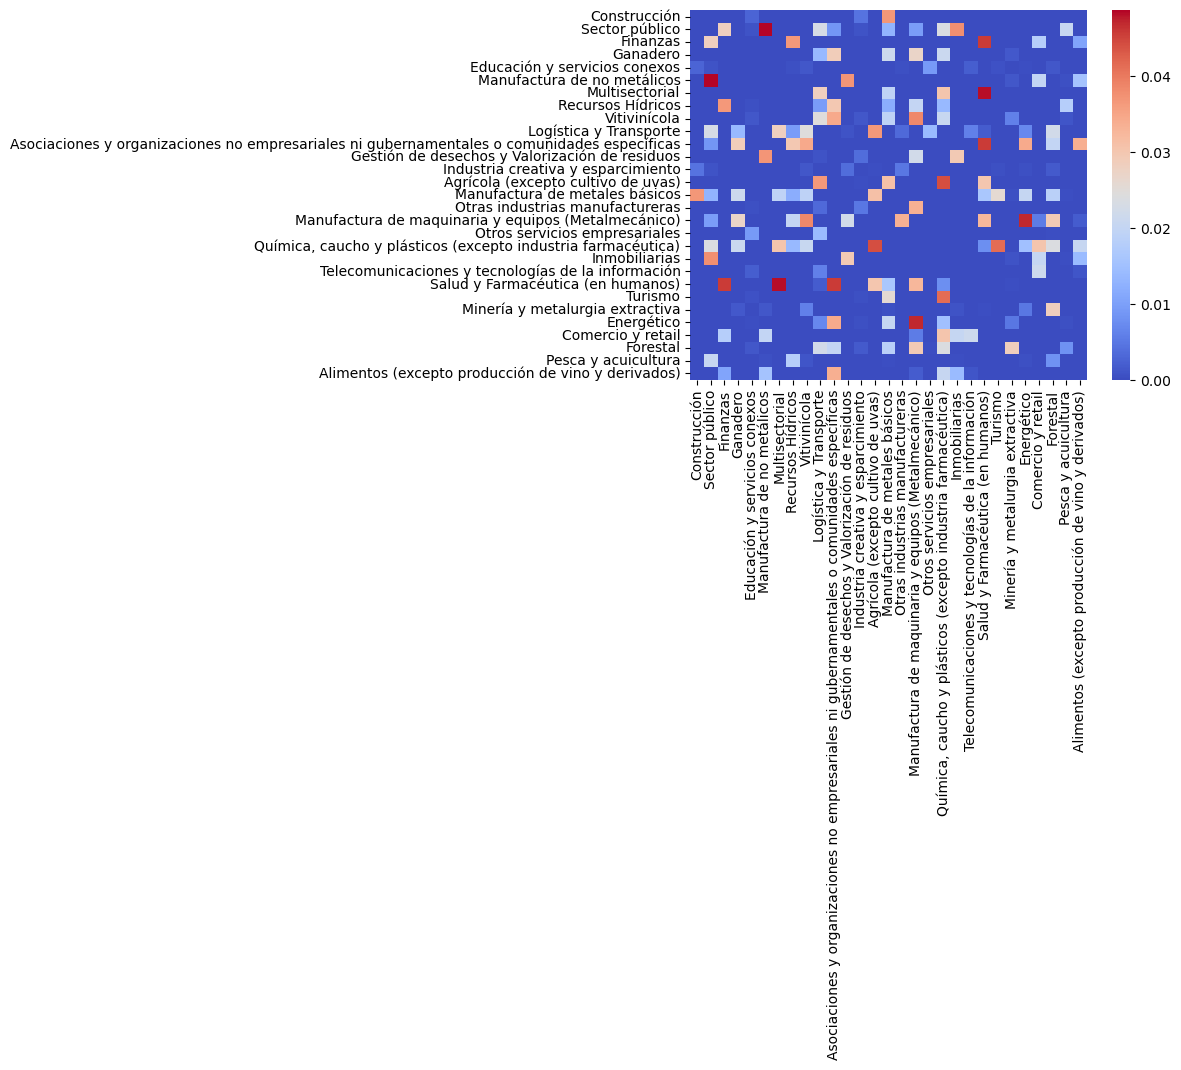

In [61]:
# Create a Heatmap to visualize which groups show differences - Economic Sector

import seaborn as sns

# Create set of unique economic sector names
sector_names = set(significant_pairs_df['SectorEconomico 1']).union(set(significant_pairs_df['SectorEconomico 2']))

# Create empty square matrix
pval_matrix = np.zeros((len(sector_names), len(sector_names)))

# Fill matrix with adjusted p-values
for row in significant_pairs_df.itertuples():
    idx1 = list(sector_names).index(row[1])
    idx2 = list(sector_names).index(row[2])
    pval_matrix[idx1, idx2] = row[3]
    pval_matrix[idx2, idx1] = row[3]

# Create heatmap of adjusted p-values
sns.heatmap(pval_matrix, cmap='coolwarm', xticklabels=list(sector_names), yticklabels=list(sector_names))

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show plot
plt.show()
#plt.savefig('ES_dunn_heatmap.png')

In [62]:
# Kruskal Wallis test for Area of knowledge and Amount

from scipy.stats import kruskal

# Perform Kruskal-Wallis test
statistic_ak, p_value_ak = kruskal(*[not_null_ak['Monto'][not_null_ak['AreaConocimiento'] == sector] for sector in not_null_ak['AreaConocimiento'].unique()])

# Print results
print(f"Kruskal-Wallis Test Results: statistic={statistic_ak}, p-value={p_value_ak}")

# Since the p-value is 5.9e-112, which is considerably smaller than the significance level of 0.05, I can conclude that there is
# a statistically significant difference between the amount given to the AreaConocimiento column's groups.

Kruskal-Wallis Test Results: statistic=533.1984929879918, p-value=5.906962442975894e-112


In [63]:
# Since AreaConocimiento has 7 different groups, the post-hoc test used to determine which groups have difference in their
# medians (Dunn's test) has to include a correction to account for the number of groups. In this case, I used the 
# Bonferroni correction. This is more conservative, which means that it controls the overall false positive rate better. 
# However, it may result in a higher chance of false negatives, which means that it is more likely to miss true differences 
# between groups.

import itertools
import scikit_posthocs as sp

# Define significance level
alpha = 0.05

# Get unique groups in 'AreaConocimiento' column
groups_ak = not_null_ak['AreaConocimiento'].unique()

# Filter out groups with only one observation
counts = not_null_ak['AreaConocimiento'].value_counts()
groups_ak = groups_ak[counts[groups_ak] > 1]

# Perform Dunn's test with Bonferroni correction for all pairwise comparisons
significant_pairs = []
for group1, group2 in itertools.combinations(groups_ak, 2):
    subset = not_null_ak.loc[not_null_ak['AreaConocimiento'].isin([group1, group2])]
    posthoc = sp.posthoc_dunn(subset, val_col='Monto', group_col='AreaConocimiento', p_adjust='bonferroni')
    pval = posthoc.iloc[0, 1]
    if pval < alpha:
        significant_pairs.append((group1, group2, pval))

# Convert significant pairwise comparisons to DataFrame and display
significant_pairs_ak = pd.DataFrame(significant_pairs, columns=['AreaConocimiento 1', 'AreaConocimiento 2', 'Adjusted p-value'])
print(significant_pairs_ak)

                   AreaConocimiento 1                 AreaConocimiento 2  \
0                  Ciencias Naturales                  Ciencias Sociales   
1                  Ciencias Naturales     Ciencias Médicas y de la Salud   
2                  Ciencias Naturales  Ciencias Agrícolas y Veterinarias   
3                  Ciencias Naturales                Humanidades y Artes   
4                  Ciencias Naturales                 Multidisciplinario   
5             Ingeniería y Tecnología                  Ciencias Sociales   
6             Ingeniería y Tecnología     Ciencias Médicas y de la Salud   
7             Ingeniería y Tecnología  Ciencias Agrícolas y Veterinarias   
8             Ingeniería y Tecnología                Humanidades y Artes   
9             Ingeniería y Tecnología                 Multidisciplinario   
10                  Ciencias Sociales     Ciencias Médicas y de la Salud   
11                  Ciencias Sociales  Ciencias Agrícolas y Veterinarias   
12          

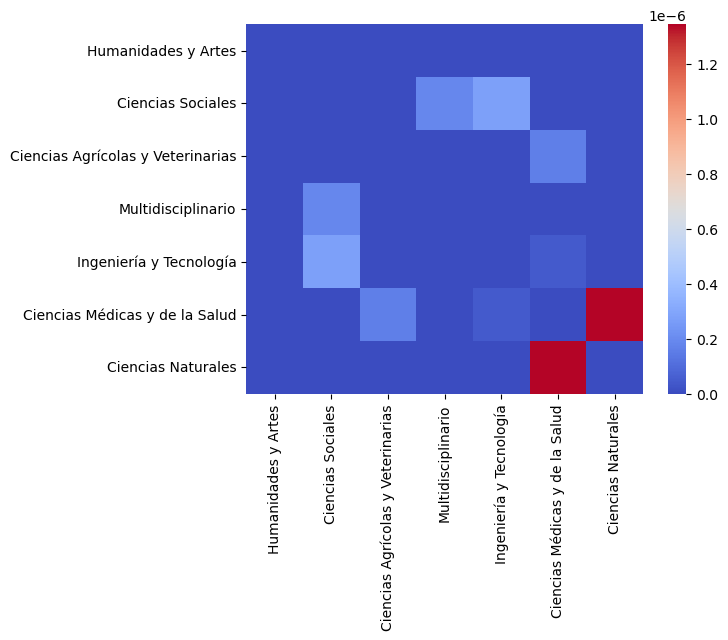

In [64]:
# Create a Heatmap to visualize which groups show differences - Area of Knowledge

import seaborn as sns

# Create set of unique economic sector names
sector_names = set(significant_pairs_ak['AreaConocimiento 1']).union(set(significant_pairs_ak['AreaConocimiento 2']))

# Create empty square matrix
pval_matrix = np.zeros((len(sector_names), len(sector_names)))

# Fill matrix with adjusted p-values
for row in significant_pairs_ak.itertuples():
    idx1 = list(sector_names).index(row[1])
    idx2 = list(sector_names).index(row[2])
    pval_matrix[idx1, idx2] = row[3]
    pval_matrix[idx2, idx1] = row[3]

# Create heatmap of adjusted p-values
sns.heatmap(pval_matrix, cmap='coolwarm', xticklabels=list(sector_names), yticklabels=list(sector_names))

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show plot
plt.show()

#plt.savefig('AOK_dunn_heatmap.png')

In [65]:
# Kruskal Wallis test for Region and Amount

from scipy.stats import kruskal

# Perform Kruskal-Wallis test
statistic_r, p_value_r = kruskal(*[not_null_r['Monto'][not_null_r['RegionEjecucion'] == sector] for sector in not_null_r['RegionEjecucion'].unique()])

# Print results
print(f"Kruskal-Wallis Test Results: statistic={statistic_r}, p-value={p_value_r}")

# Since the p-value is 2.21e-53, which is considerably smaller than the significance level of 0.05, I can conclude that there is
# a statistically significant difference between the amount given to the Region column's groups.

Kruskal-Wallis Test Results: statistic=299.11481104228284, p-value=1.7143299168216017e-53


In [66]:
# Since Region has 13 different groups, the post-hoc test used to determine which groups have difference in their
# medians (Dunn's test) has to include a correction to account for the number of groups. In this case, I used the 
# Bonferroni correction. This is more conservative, which means that it controls the overall false positive rate better. 
# However, it may result in a higher chance of false negatives, which means that it is more likely to miss true differences 
# between groups.

import itertools
import scikit_posthocs as sp

# Define significance level
alpha = 0.05

# Get unique groups in 'AreaConocimiento' column
groups_r = not_null_r['RegionEjecucion'].unique()

# Filter out groups with only one observation
counts = not_null_r['RegionEjecucion'].value_counts()
groups_r = groups_r[counts[groups_r] > 1]

# Perform Dunn's test with Bonferroni correction for all pairwise comparisons
significant_pairs = []
for group1, group2 in itertools.combinations(groups_r, 2):
    subset = not_null_r.loc[not_null_r['RegionEjecucion'].isin([group1, group2])]
    posthoc = sp.posthoc_dunn(subset, val_col='Monto', group_col='RegionEjecucion', p_adjust='bonferroni')
    pval = posthoc.iloc[0, 1]
    if pval < alpha:
        significant_pairs.append((group1, group2, pval))

# Convert significant pairwise comparisons to DataFrame and display
significant_pairs_r = pd.DataFrame(significant_pairs, columns=['RegionEjecucion 1', 'RegionEjecucion 2', 'Adjusted p-value'])
print(significant_pairs_r)

                                    RegionEjecucion 1       RegionEjecucion 2  \
0                    Región Metropolitana de Santiago   Región de Antofagasta   
1                    Región Metropolitana de Santiago  Región de La Araucanía   
2                    Región Metropolitana de Santiago    Región de Valparaíso   
3                    Región Metropolitana de Santiago       Región del Biobío   
4                    Región Metropolitana de Santiago      Región de Los Ríos   
..                                                ...                     ...   
72  Región de Aysén del General Carlos Ibáñez del ...           Multiregional   
73  Región de Aysén del General Carlos Ibáñez del ...              Extranjero   
74                                    Región de Ñuble           Multiregional   
75                                    Región de Ñuble              Extranjero   
76                                      Multiregional              Extranjero   

    Adjusted p-value  
0   

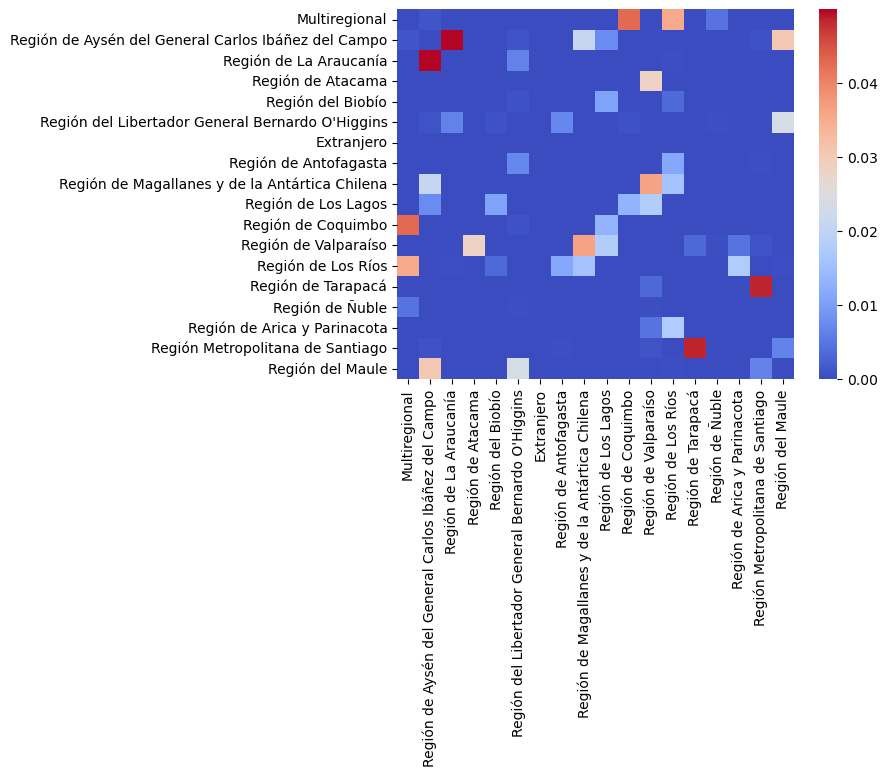

In [67]:
# Create a Heatmap to visualize which groups show differences - Region

import seaborn as sns

# Create set of unique economic sector names
sector_names = set(significant_pairs_r['RegionEjecucion 1']).union(set(significant_pairs_r['RegionEjecucion 2']))

# Create empty square matrix
pval_matrix = np.zeros((len(sector_names), len(sector_names)))

# Fill matrix with adjusted p-values
for row in significant_pairs_r.itertuples():
    idx1 = list(sector_names).index(row[1])
    idx2 = list(sector_names).index(row[2])
    pval_matrix[idx1, idx2] = row[3]
    pval_matrix[idx2, idx1] = row[3]

# Create heatmap of adjusted p-values
sns.heatmap(pval_matrix, cmap='coolwarm', xticklabels=list(sector_names), yticklabels=list(sector_names))

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show plot
plt.show()

#plt.savefig('region_dunn_heatmap.png')